import libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

create KNN classifier

In [141]:
class KNN():

  def __init__(self, distance_metric, n_neighbors):
    self.distance_metric = distance_metric
    self.n_neighbors = n_neighbors

  def fit(self, X_train):
    self.X_train = X_train

  def get_distance(self, p1, p2):
    dist = 0

    for i in range(len(p1) - 1): # - 1 skip the label
      if (self.distance_metric == 'euclidean'):
        dist += (p1[i] - p2[i]) ** 2
      else:
        dist += np.abs(p1[i] - p2[i])

    if (self.distance_metric == 'euclidean'):
      return np.sqrt(dist)
    return dist


  def get_nearest_neighbor(self, test_point):
    distance_list = []
    for train_point in self.X_train:
      distance = self.get_distance(train_point, test_point)
      distance_list.append([train_point, distance])

    distance_list.sort(key=lambda x:x[1])
    neighbors = []

    for i in range(self.n_neighbors):
      neighbors.append(distance_list[i][0])

    return neighbors

  def predict(self, test_data):
    Y_predict = []
    for test_point in test_data:
      neighbors = self.get_nearest_neighbor(test_point)
      labels = [neighbor[-1] for neighbor in neighbors]
      prediction = statistics.mode(labels)
      Y_predict.append(prediction)

    return Y_predict


read data

In [142]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :].values
Y = dataset.iloc[:, -1].values


split the data

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


standardise the data

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])
X_test[:, :-1] = scaler.transform(X_test[:, :-1])

train the model

In [145]:
kneareast_classifier = KNN(distance_metric = 'euclidean', n_neighbors = 5)
kneareast_classifier.fit(X_train)


visualise test results

accuracy score for the model = 0.7987012987012987


<Axes: >

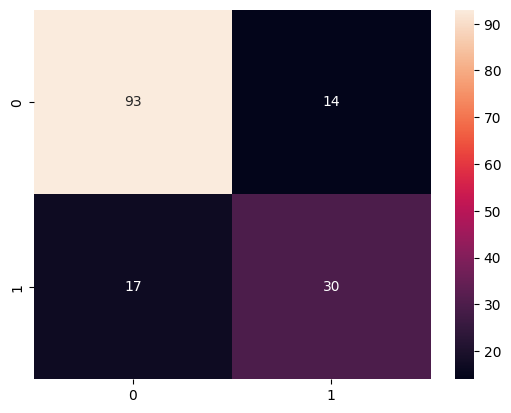

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

Y_predict = kneareast_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict)
accuracy_score = accuracy_score(Y_test, Y_predict)
print('accuracy score for the model =', accuracy_score)
sns.heatmap(cm, annot = True)